Task is to predict future energy consumption trends.
Data Understanding and Preprocessing
The dataset includes each minute’s energy consumption data spanning from December 2006 to November 2010. We will extract only the hourly data and will be working on this dataset.
We will parse the date-time information in the dataset to ensure proper indexing and handling for time series analysis.
Check for and handle missing or corrupted data: 
o	Use interpolation or appropriate imputation techniques to fill gaps in the data.
o	Remove extreme outliers that may distort predictions unless they represent significant anomalies.
Perform exploratory data analysis (EDA): 
o	Visualize energy consumption trends over time.
o	Analyze daily, weekly, and seasonal patterns.
Feature Engineering
Extract meaningful time-based features such as: 
o	Day of the week
o	Month
o	Hour of the day
o	Seasonal indicators (e.g., holidays or temperature data if available)

Model Selection and Training
Choose suitable time series forecasting technique. Use the following models: 
o	ARIMA and SARIMA for statistical approaches.
o	LSTM for neural network-based forecasting.
Split the dataset into training, and testing sets: 
Train the model to minimize error metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE).
Model Evaluation


In [4]:
# Step 1: Install and import necessary libraries
!pip install ucimlrepo pandas matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo


In [8]:
# Step 2: Load the dataset
print("Fetching the dataset from UCI repository...")
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# Extract features and target into separate DataFrames
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# Display metadata and variable information for better understanding
print("Dataset Metadata:\n", individual_household_electric_power_consumption.metadata, "\n")
print("Variable Information:\n", individual_household_electric_power_consumption.variables, "\n")

Fetching the dataset from UCI repository...


C:\Users\Farooq\anaconda3\Lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Dataset Metadata:
 {'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'sum

In [9]:
# Step 3: Combine features and target for full dataset
# Assume `y` is empty since no target column was mentioned
data = X.copy()

# Step 4: Save the original dataset for reference
original_data = data.copy()  # Saving the original dataset

# Step 5: Inspect the dataset structure
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()



Dataset Head:
          Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total

In [10]:
# Check for missing values
print("\nMissing Values per Column:\n", data.isnull().sum())



Missing Values per Column:
 Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64


In [11]:
# Part 2: Data Preprocessing

import pandas as pd
import numpy as np

# Combine 'Date' and 'Time' into a single 'datetime' column
# Convert 'Date' and 'Time' to a datetime format
try:
    X['datetime'] = pd.to_datetime(X['Date'] + ' ' + X['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
    print("Successfully combined 'Date' and 'Time' into 'datetime'.")
except Exception as e:
    print(f"Error during datetime parsing: {e}")

# Drop rows where 'datetime' could not be parsed
X = X.dropna(subset=['datetime'])
print(f"Remaining rows after dropping invalid datetimes: {len(X)}")


Successfully combined 'Date' and 'Time' into 'datetime'.
Remaining rows after dropping invalid datetimes: 2075259


In [12]:
# Drop the original 'Date' and 'Time' columns
X = X.drop(columns=['Date', 'Time'])

# Convert numerical columns from object to numeric
# Coerce invalid values to NaN
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
                'Sub_metering_1', 'Sub_metering_2']

for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')


In [13]:
# Check for missing values again after conversion
missing_summary = X.isnull().sum()
print("Missing values after conversion to numeric:")
print(missing_summary)


Missing values after conversion to numeric:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
datetime                     0
dtype: int64


In [14]:

# Handle missing values by linear interpolation
X = X.interpolate(method='linear', limit_direction='forward', axis=0)

# Drop any remaining rows with missing values (edge cases)
X = X.dropna()
print(f"Remaining rows after handling missing values: {len(X)}")

# Resample the data to hourly intervals
X = X.set_index('datetime')
hourly_data = X.resample('H').mean()

# Save the hourly data for inspection
hourly_data.to_csv("hourly_data.csv")
print("Hourly data extracted and saved to 'hourly_data.csv'.")
print(hourly_data.head())

# Save intermediate cleaned data for future inspection
X.to_csv("cleaned_data.csv")
print("Cleaned minute-level data saved to 'cleaned_data.csv'.")


Remaining rows after handling missing values: 2075259


C:\Users\Farooq\AppData\Local\Temp\ipykernel_6700\427590425.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = X.resample('H').mean()


Hourly data extracted and saved to 'hourly_data.csv'.
                     Global_active_power  Global_reactive_power     Voltage  \
datetime                                                                      
2006-12-16 17:00:00             4.222889               0.229000  234.643889   
2006-12-16 18:00:00             3.632200               0.080033  234.580167   
2006-12-16 19:00:00             3.400233               0.085233  233.232500   
2006-12-16 20:00:00             3.268567               0.075100  234.071500   
2006-12-16 21:00:00             3.056467               0.076667  237.158667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:00:00         18.100000             0.0        0.527778   
2006-12-16 18:00:00         15.600000             0.0        6.716667   
2006-12-16 19:00:00         14.503333             0.0        1.433333   
2006-12-16 20:00:00        

Analysis of Output
Datetime Parsing and Validation:

Successfully combined Date and Time columns into datetime.
No rows were dropped due to invalid datetime values (Remaining rows after dropping invalid datetimes: 2075259).
Missing Value Handling:

The original dataset had approximately 25979 missing values for several columns (around 1.25% of the data).
Missing values were successfully handled using linear interpolation, and the dataset was restored to its full size (Remaining rows after handling missing values: 2075259).
Resampling:

Resampling to hourly intervals completed successfully, and the average values for each hour were calculated.
Hourly data was saved to hourly_data.csv and looks well-structured in the output preview.

After preprocessing, the data appears clean and ready for analysis.
The hourly data captures the necessary structure for trend analysis and model training.


In [15]:
hourly_data = X.resample('h').mean()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# 1. Load the hourly data
data_path = 'hourly_data.csv'
hourly_data = pd.read_csv(data_path, parse_dates=['datetime'], index_col='datetime')

# Verify the structure of the dataset
print("Dataset Info:")
print(hourly_data.info())
print("\nSummary Statistics:")
print(hourly_data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34589 entries, 2006-12-16 17:00:00 to 2010-11-26 21:00:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    34589 non-null  float64
 1   Global_reactive_power  34589 non-null  float64
 2   Voltage                34589 non-null  float64
 3   Global_intensity       34589 non-null  float64
 4   Sub_metering_1         34589 non-null  float64
 5   Sub_metering_2         34589 non-null  float64
 6   Sub_metering_3         34589 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB
None

Summary Statistics:
       Global_active_power  Global_reactive_power       Voltage  \
count         34589.000000           34589.000000  34589.000000   
mean              1.090311               0.123647    240.832682   
std               0.894323               0.067072      3.001576   
min               0.124000               

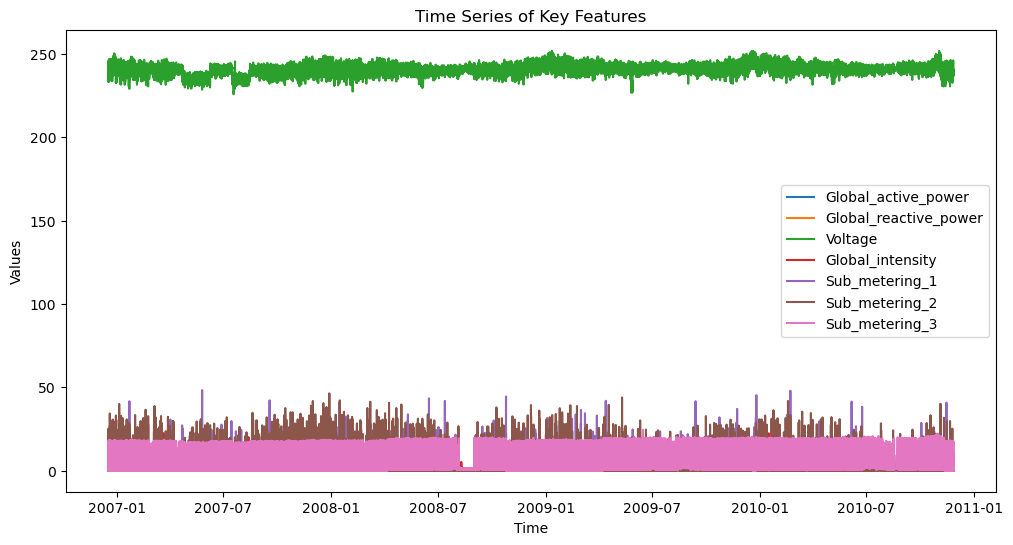

In [18]:
# 2. Plot time-series data for key features
plt.figure(figsize=(12, 6))
for column in hourly_data.columns:
    plt.plot(hourly_data.index, hourly_data[column], label=column)
plt.title("Time Series of Key Features")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()

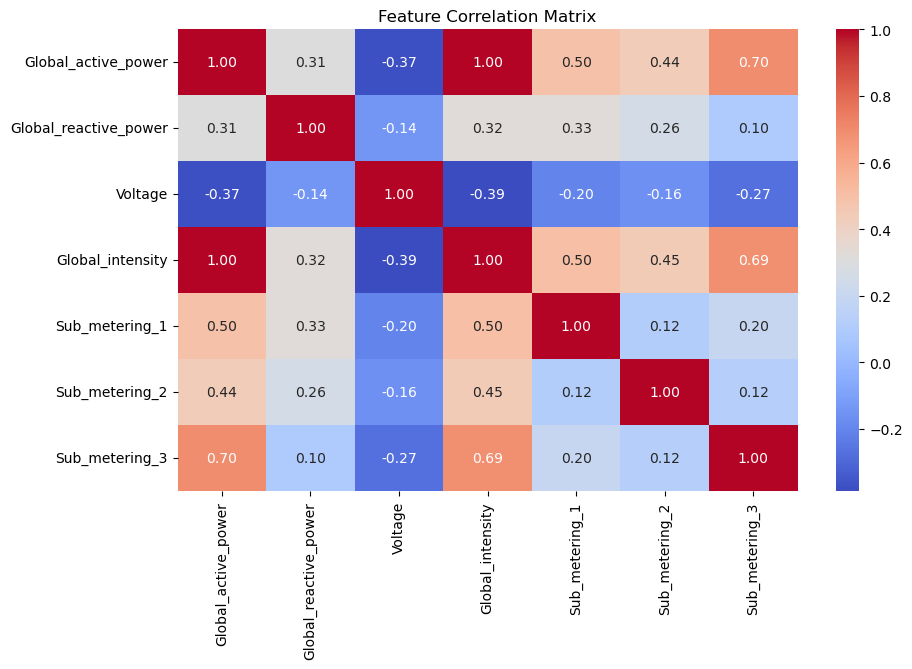

In [19]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

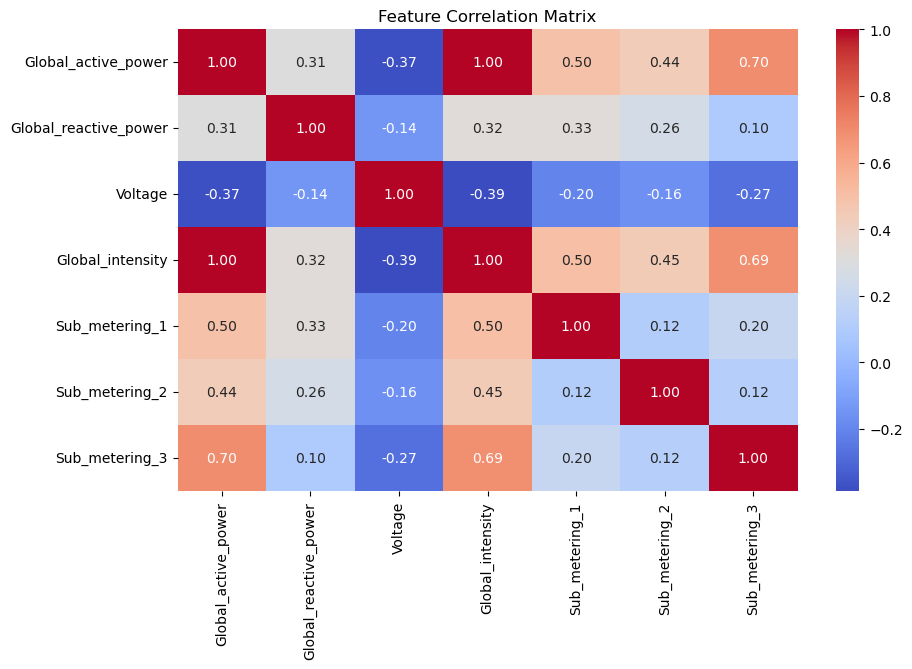

In [20]:
# 3. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

<Figure size 1200x800 with 0 Axes>

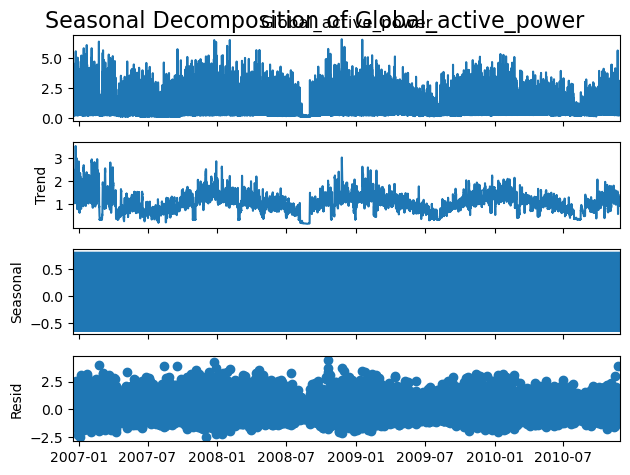

In [21]:
# 4. Seasonal decomposition of Global_active_power
decomposition = seasonal_decompose(hourly_data['Global_active_power'], model='additive', period=24)

# Plot decomposition results
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Global_active_power", fontsize=16)
plt.show()


In [22]:
# 5. Detect anomalies (optional visualization)
threshold = 3  # Set a threshold for anomaly detection based on z-scores
z_scores = (hourly_data - hourly_data.mean()) / hourly_data.std()
anomalies = z_scores[(z_scores.abs() > threshold)]

print("\nAnomalies Detected:")
print(anomalies.dropna(how='all'))

# Save the dataset with z-scores and anomaly flags for inspection
hourly_data['z_scores'] = z_scores['Global_active_power']
hourly_data['is_anomaly'] = (z_scores['Global_active_power'].abs() > threshold).astype(int)
hourly_data.to_csv('eda_hourly_data.csv')

print("EDA complete. Data with anomaly flags saved to 'eda_hourly_data.csv'.")



Anomalies Detected:
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:00:00             3.502735                    NaN      NaN   
2006-12-17 01:00:00                  NaN                    NaN      NaN   
2006-12-17 10:00:00                  NaN                    NaN      NaN   
2006-12-18 08:00:00                  NaN                    NaN      NaN   
2006-12-18 23:00:00                  NaN                    NaN      NaN   
...                                  ...                    ...      ...   
2010-11-20 19:00:00                  NaN               3.068158      NaN   
2010-11-22 10:00:00                  NaN                    NaN      NaN   
2010-11-22 18:00:00                  NaN                    NaN      NaN   
2010-11-22 19:00:00                  NaN                    NaN      NaN   
2010-11-24 17:00:00                  NaN                    NaN    

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [24]:

def create_time_features(df):
    """
    Create time-based features from datetime index
    """
    # Make a copy of the dataframe
    df = df.copy()

    # Extract time-based features
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear

    # Create cyclical features for hour and month
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)
    df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
    df['month_cos'] = np.cos(2 * np.pi * df['month']/12)

    return df

def create_lag_features(df, target_col='Global_active_power', lags=[1, 24, 168]):
    """
    Create lag features and rolling statistics
    lags: list of hours to lag (1=previous hour, 24=previous day, 168=previous week)
    """
    df = df.copy()

    # Create lag features
    for lag in lags:
        df[f'{target_col}_lag_{lag}h'] = df[target_col].shift(lag)

    # Create rolling mean features
    windows = [24, 168]  # 24 hours (day), 168 hours (week)
    for window in windows:
        df[f'{target_col}_rolling_mean_{window}h'] = df[target_col].rolling(window=window).mean()
        df[f'{target_col}_rolling_std_{window}h'] = df[target_col].rolling(window=window).std()

    return df


In [25]:
# Load the hourly data
df = pd.read_csv('hourly_data.csv', parse_dates=['datetime'], index_col='datetime')

# Create features
df_featured = create_time_features(df)
df_featured = create_lag_features(df_featured)

# Drop rows with NaN values (created by lag features)
df_featured = df_featured.dropna()

# Split features and target
target_col = 'Global_active_power'
feature_cols = [col for col in df_featured.columns if col != target_col]

X = df_featured[feature_cols]
y = df_featured[target_col]

# Split the data into training, validation, and test sets
# Keep the last 30 days for testing
test_size = 24 * 30  # 30 days of hourly data
val_size = 24 * 30   # 30 days for validation

X_test = X[-test_size:]
y_test = y[-test_size:]
X_val = X[-test_size-val_size:-test_size]
y_val = y[-test_size-val_size:-test_size]
X_train = X[:-test_size-val_size]
y_train = y[:-test_size-val_size]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Save the prepared data
np.save('X_train_scaled.npy', X_train_scaled)
np.save('X_val_scaled.npy', X_val_scaled)
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
np.save('y_test.npy', y_test)

# Save the scaler for later use
import joblib
joblib.dump(scaler, 'scaler.joblib')

print("Feature engineering completed. Data split and scaled.")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Validation set shape: {X_val_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

# Display sample of created features
print("\nSample of created features:")
print(df_featured.head())

Feature engineering completed. Data split and scaled.
Training set shape: (32981, 23)
Validation set shape: (720, 23)
Test set shape: (720, 23)

Sample of created features:
                     Global_active_power  Global_reactive_power     Voltage  \
datetime                                                                      
2006-12-23 17:00:00             5.452533               0.215967  233.644167   
2006-12-23 18:00:00             3.879400               0.099767  238.000500   
2006-12-23 19:00:00             4.117833               0.205333  238.729333   
2006-12-23 20:00:00             4.181400               0.124767  238.518833   
2006-12-23 21:00:00             3.288433               0.235767  238.594667   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-23 17:00:00         23.360000       16.183333        0.666667   
2006-12-23 18:00:00         16.363333        0.000000 

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib

def train_sarima(df, column='Global_active_power'):
    """
    Train SARIMA model on the given data
    """
    # SARIMA parameters
    # (1,1,1) for non-seasonal component
    # (1,1,1,24) for seasonal component (24 hours)
    model = SARIMAX(df[column],
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    print("Training SARIMA model...")
    results = model.fit(disp=False)
    print("SARIMA model training completed")

    return results

def evaluate_sarima(model, train_data, test_data, column='Global_active_power'):
    """
    Evaluate SARIMA model performance
    """
    # Make predictions
    predictions = model.predict(start=len(train_data),
                              end=len(train_data) + len(test_data) - 1,
                              dynamic=False)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(test_data[column], predictions))
    mae = mean_absolute_error(test_data[column], predictions)

    print(f"SARIMA Model Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    return predictions



In [27]:
# Load the data
df = pd.read_csv('hourly_data.csv', parse_dates=['datetime'], index_col='datetime')

# Split the data (using the same splits as in feature engineering)
train_size = len(df) - 1440  # Keeping last 60 days for validation and test
train_data = df[:train_size]
test_data = df[train_size:]


In [28]:
# Train SARIMA model
sarima_model = train_sarima(train_data)

# Evaluate the model
predictions = evaluate_sarima(sarima_model, train_data, test_data)

# Save the model
joblib.dump(sarima_model, 'sarima_model.joblib')
print("SARIMA model saved as 'sarima_model.joblib'")


C:\Users\Farooq\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
C:\Users\Farooq\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Training SARIMA model...
SARIMA model training completed
SARIMA Model Metrics:
RMSE: 0.7253
MAE: 0.5710


['sarima_model.joblib']

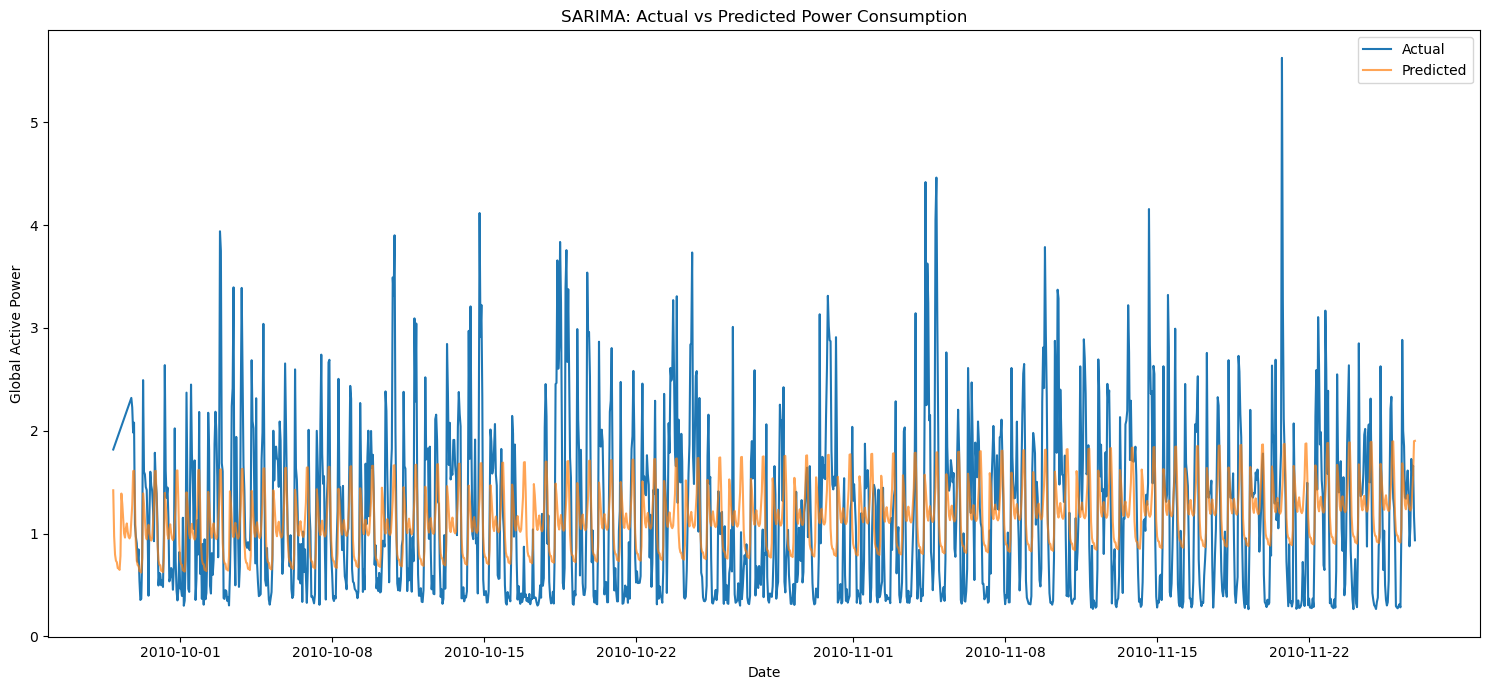

SARIMA model saved as 'sarima_model.joblib'


In [30]:
# Create visualization of predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data['Global_active_power'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', alpha=0.7)
plt.title('SARIMA: Actual vs Predicted Power Consumption')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()

